In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('data\\statcast_cleaned.csv')

In [4]:
df.dtypes

Unnamed: 0                           int64
pitch_type                          object
game_date                           object
release_speed                      float64
release_pos_x                      float64
release_pos_z                      float64
player_name                         object
batter                             float64
pitcher                            float64
zone                               float64
game_type                           object
stand                               object
p_throws                            object
home_team                           object
away_team                           object
type                                object
des                                 object
game_year                          float64
pfx_x                              float64
pfx_z                              float64
plate_x                            float64
plate_z                            float64
vx0                                float64
vy0        

In [9]:
df.pitch_type.value_counts()

FF    824051
SL    391060
CH    243930
FT    237986
CU    190872
SI    187078
FC    135811
KC     61564
FS     35348
KN      3445
EP       444
FO       367
PO       205
CS        97
SC        76
Name: pitch_type, dtype: int64

### Question: how does spinrate affect outcomes (wOBA, launch angle, exit velo) on fourseam fastballs

In [5]:
ff = df.loc[(df.pitch_type == 'FF') & (~df.woba_value.isna()),['release_spin_rate','release_extension','release_speed','woba_value','launch_speed','launch_angle','launch_speed_angle','estimated_woba_using_speedangle']]

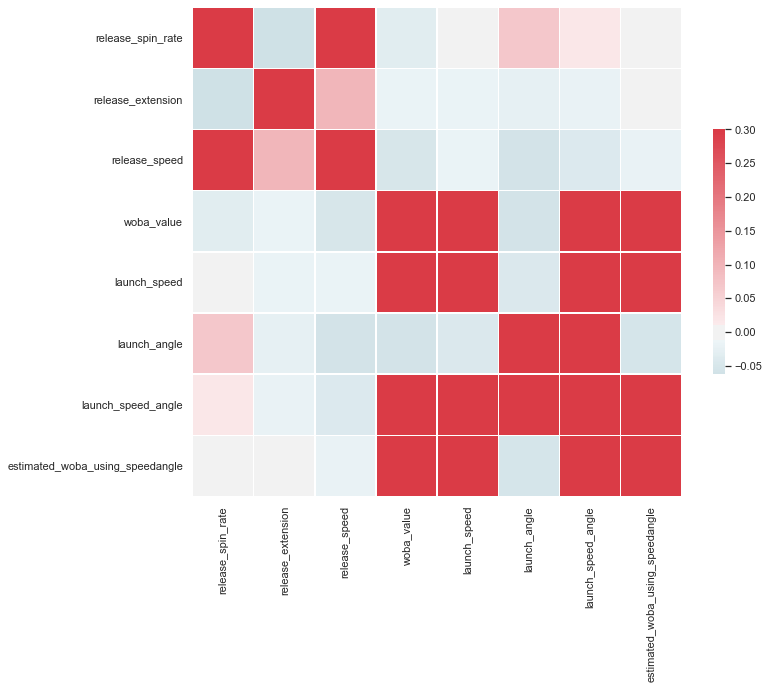

In [13]:
corr = ff.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

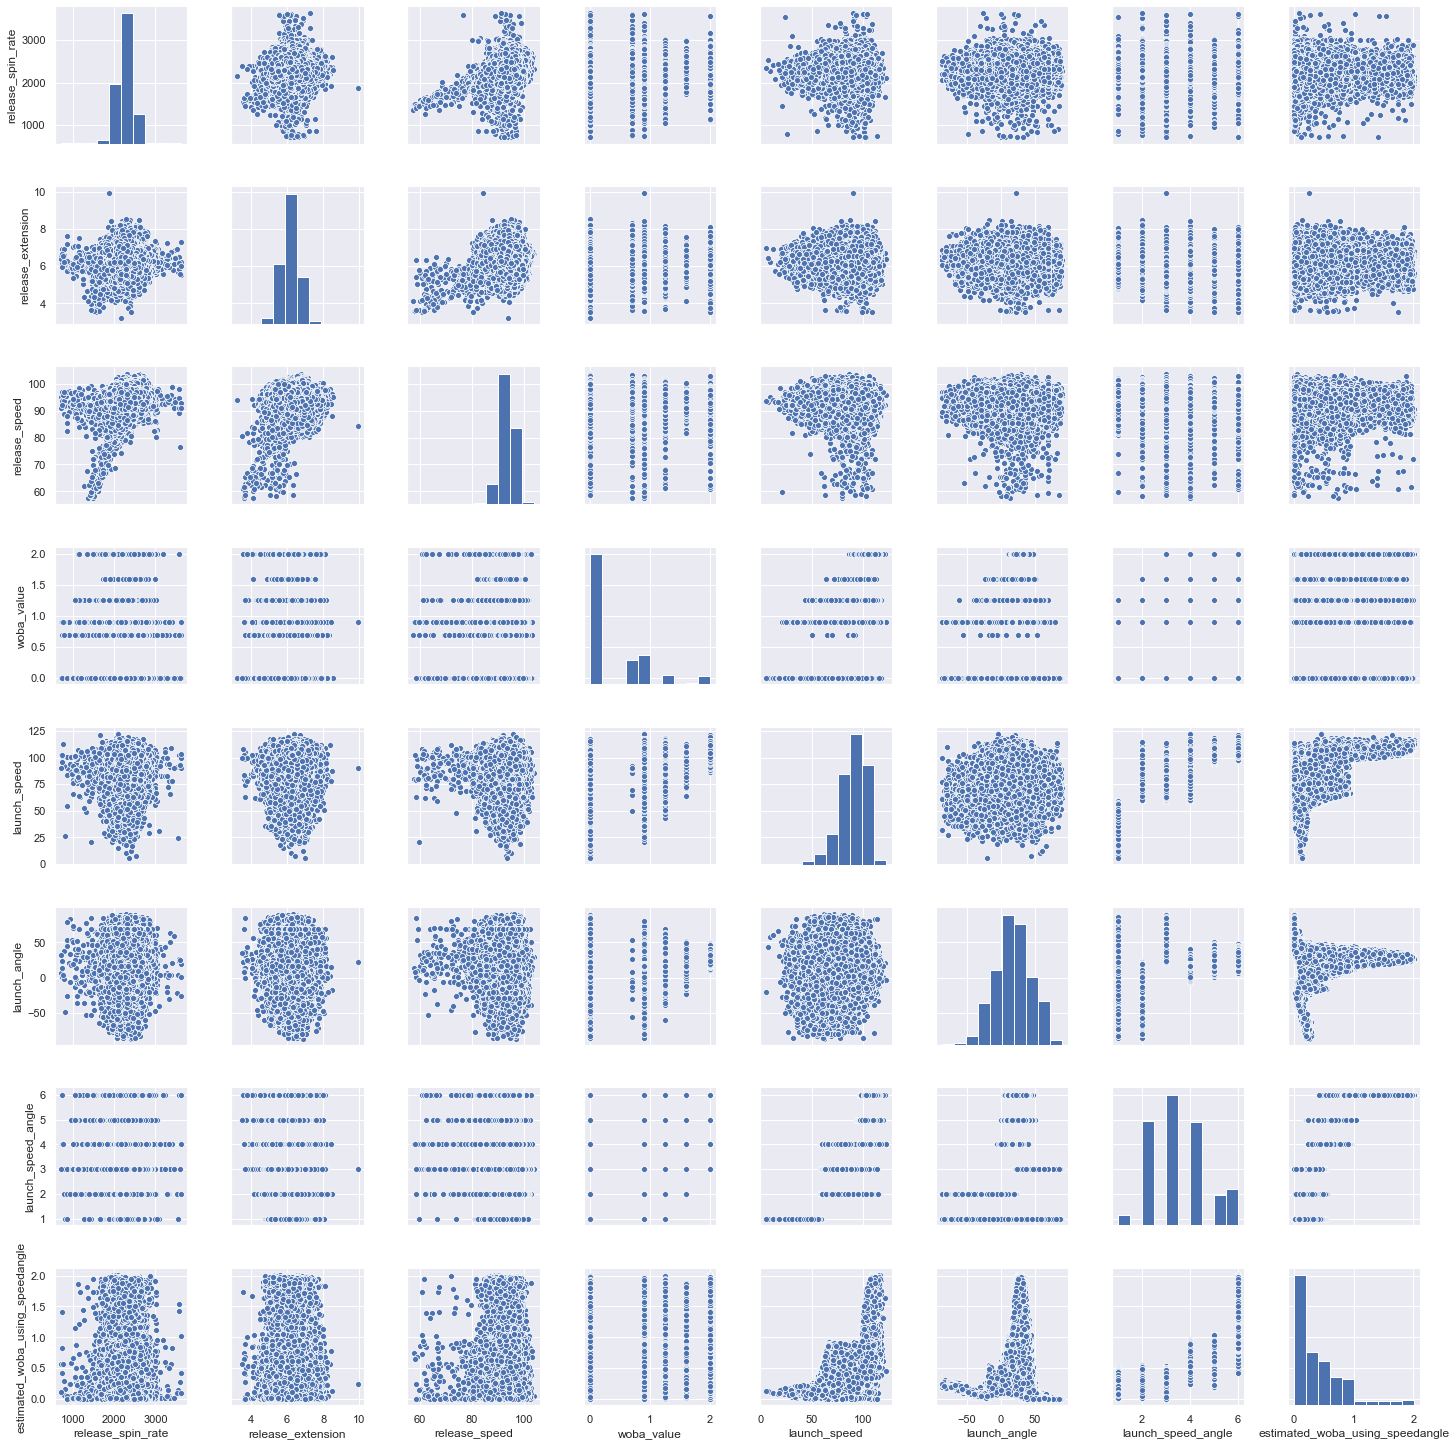

In [6]:
#scatterplot
sns.set()
sns.pairplot(ff, height = 2.5)
plt.show();

### Question: how does spinrate affect outcomes (wOBA, launch angle, exit velo) on other pitches

In [10]:
sl = df.loc[(df.pitch_type == 'SL') & (~df.woba_value.isna()),['release_spin_rate','release_extension','release_speed','woba_value','launch_speed','launch_angle','launch_speed_angle','estimated_woba_using_speedangle']]

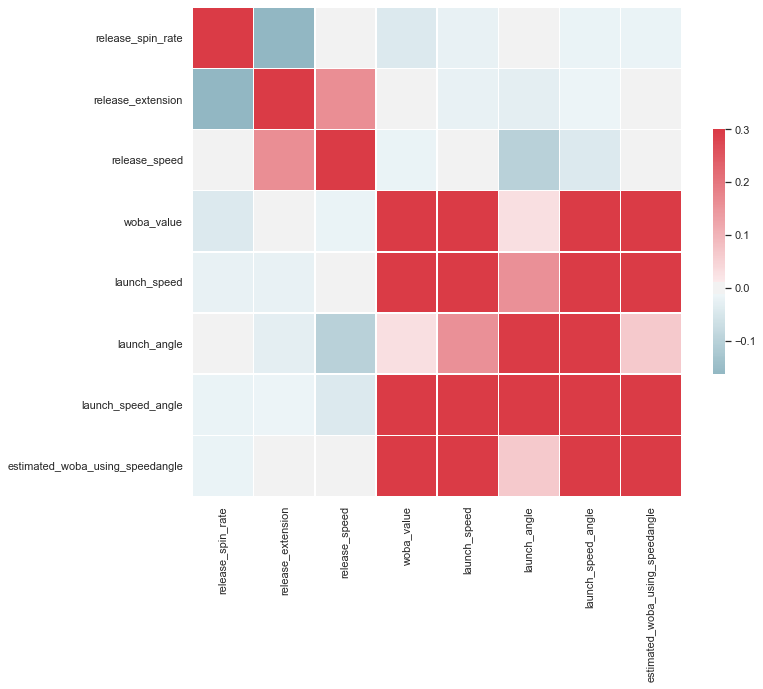

In [12]:
corr = sl.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

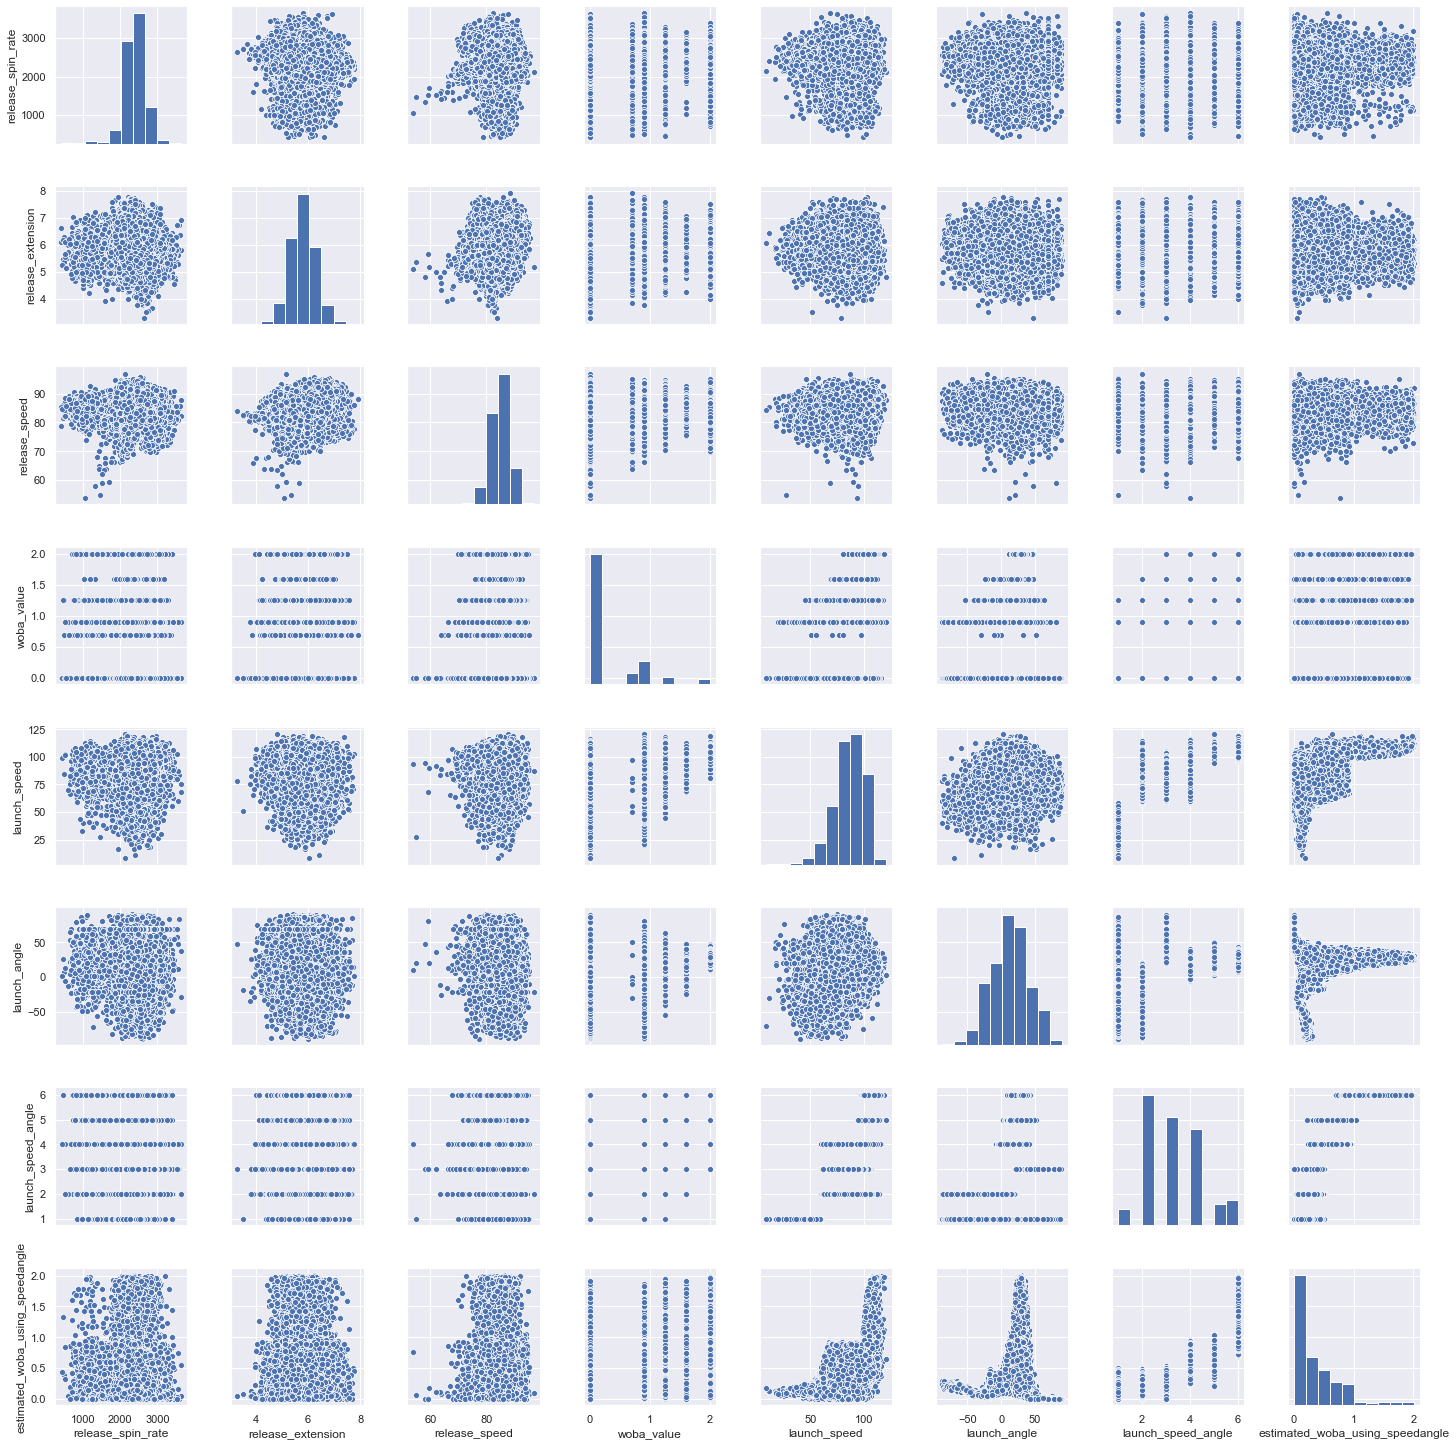

In [11]:
#scatterplot
sns.set()
sns.pairplot(sl, height = 2.5)
plt.show();

In [15]:
ch = df.loc[(df.pitch_type == 'CH') & (~df.woba_value.isna()),['release_spin_rate','release_extension','release_speed','woba_value','launch_speed','launch_angle','launch_speed_angle','estimated_woba_using_speedangle']]

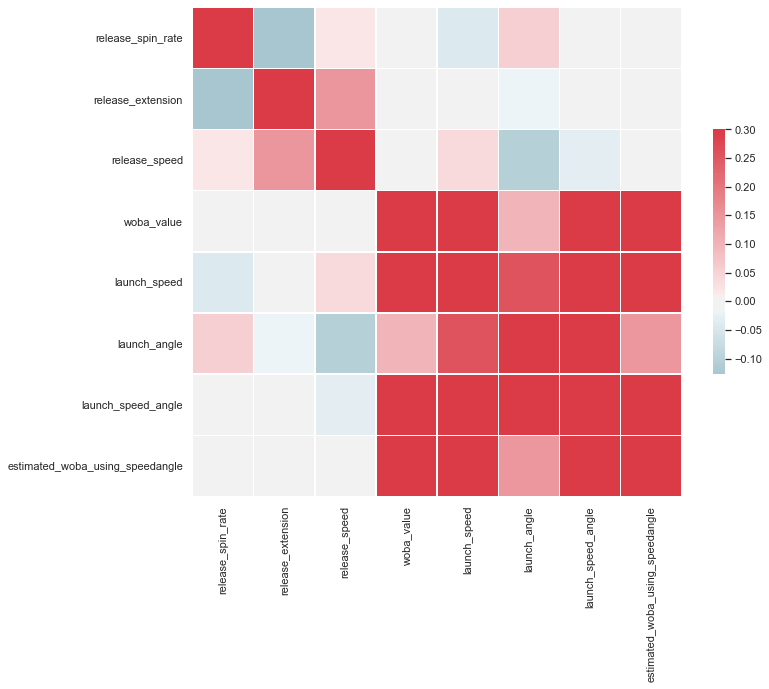

In [16]:
corr = ch.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

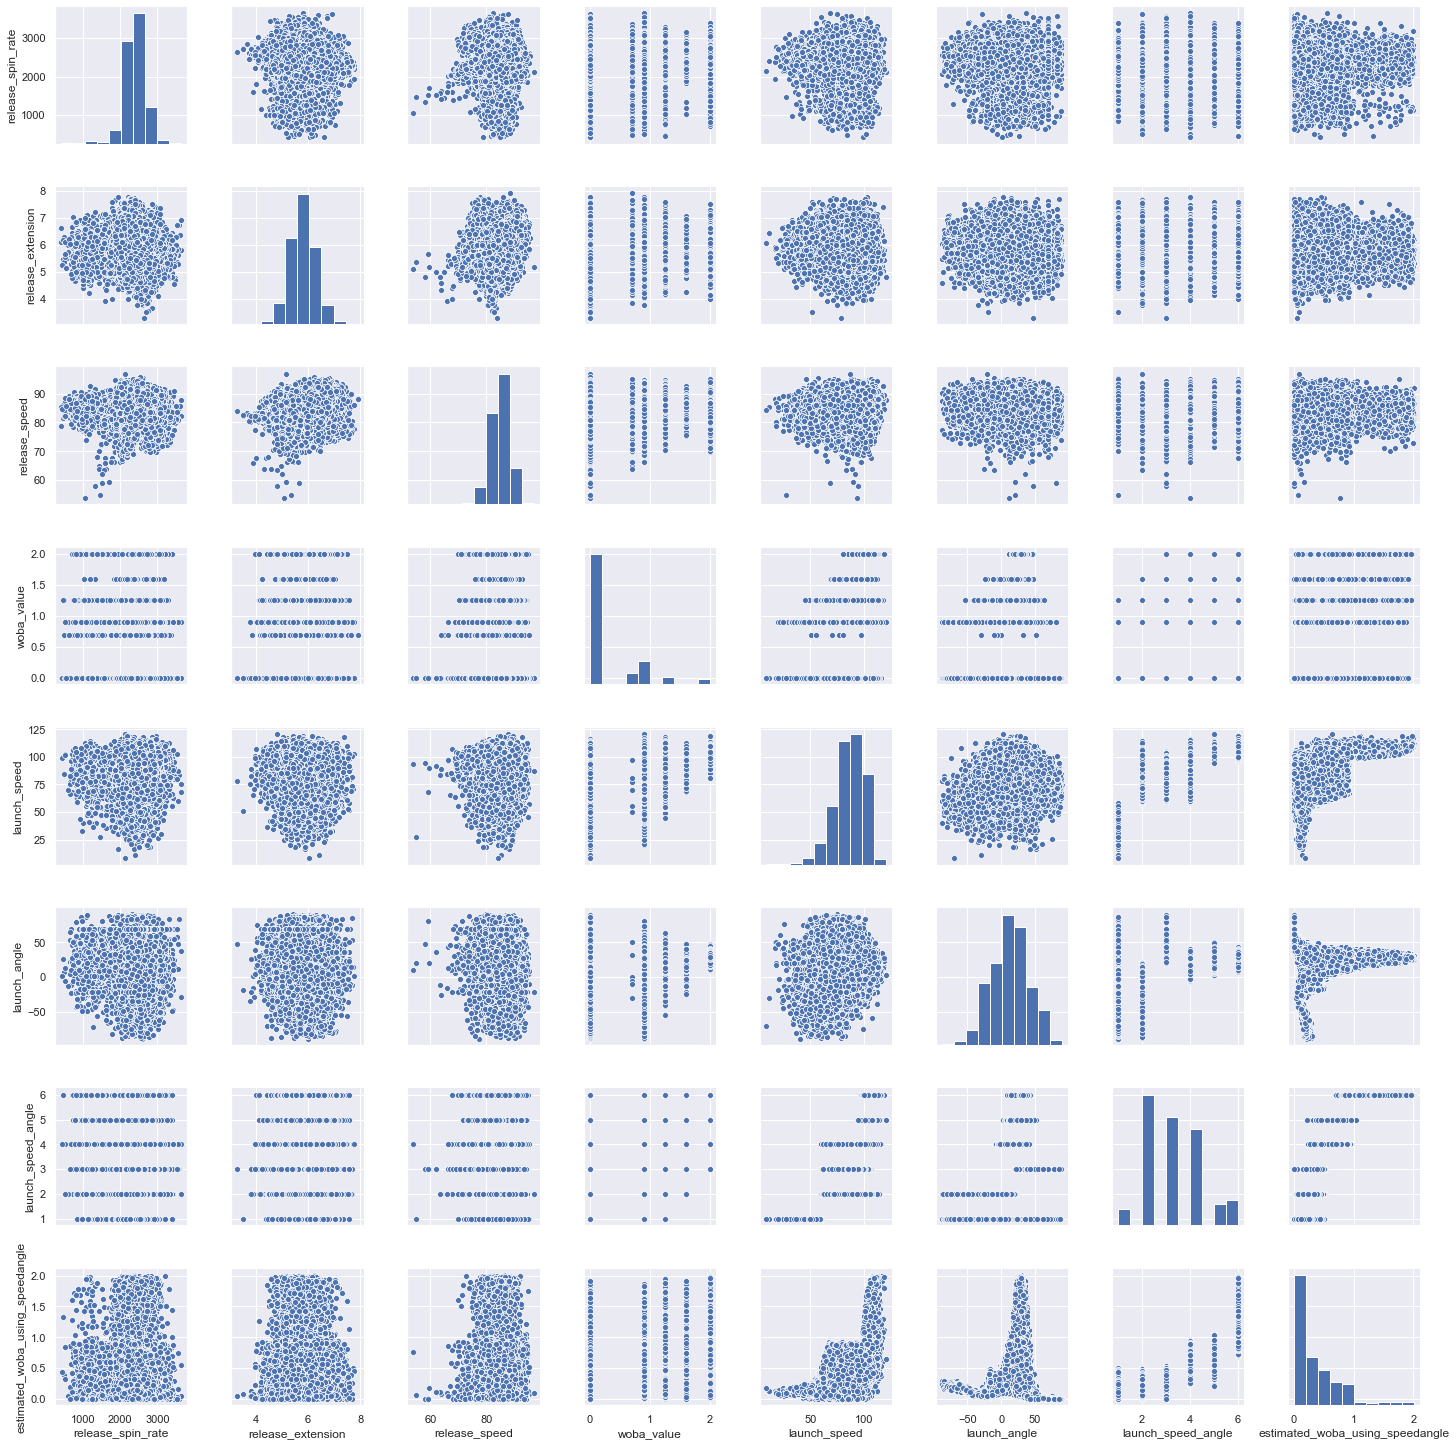

In [17]:
#scatterplot
sns.set()
sns.pairplot(sl, height = 2.5)
plt.show();

### So while there were some correlations between some vars, we have nothing that I would call definitive. However, by taking season averages of spinrate per pitch and some fangraphs data (see engineer_data.py) we can take a closer look at direct var to outcome correlations.

In [10]:
df = pd.read_csv('data\\pitcher_multivar.csv')

In [11]:
df.dtypes

Unnamed: 0         int64
player_name       object
year             float64
fb_extension     float64
fb_spinrate      float64
sl_extension     float64
sl_spinrate      float64
ct_extension     float64
ct_spinrate      float64
cb_extension     float64
cb_spinrate      float64
ch_extension     float64
ch_spinrate      float64
sfs_extension    float64
sfs_spinrate     float64
kn_extension     float64
kn_spinrate      float64
wFB              float64
wSL              float64
wCT              float64
wCB              float64
wCH              float64
wSF              float64
wKN              float64
ERA              float64
dtype: object

In [12]:
df.ERA.head()

0    3.81
1    5.94
2    3.23
3    3.99
4    5.65
Name: ERA, dtype: float64

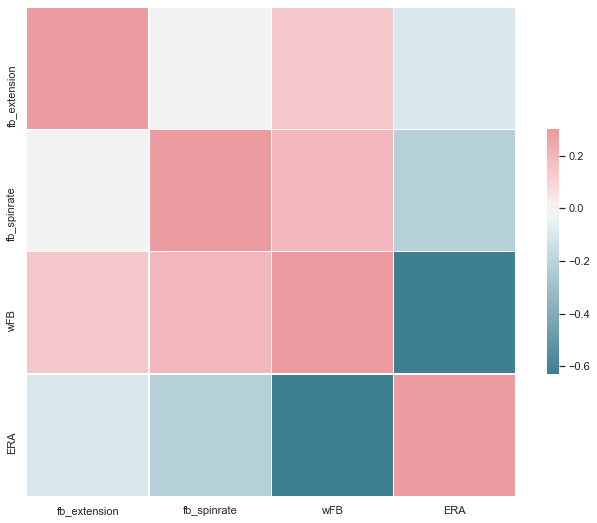

In [13]:
ff = df.loc[:,['fb_extension','fb_spinrate','wFB','ERA']]
corr = ff.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

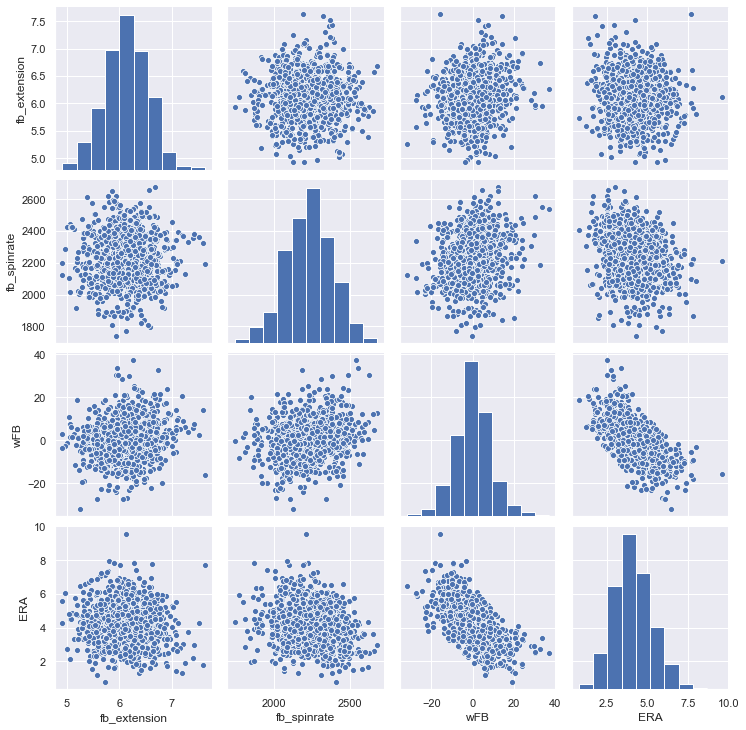

In [14]:
#scatterplot
sns.set()
sns.pairplot(ff, height = 2.5)
plt.show();

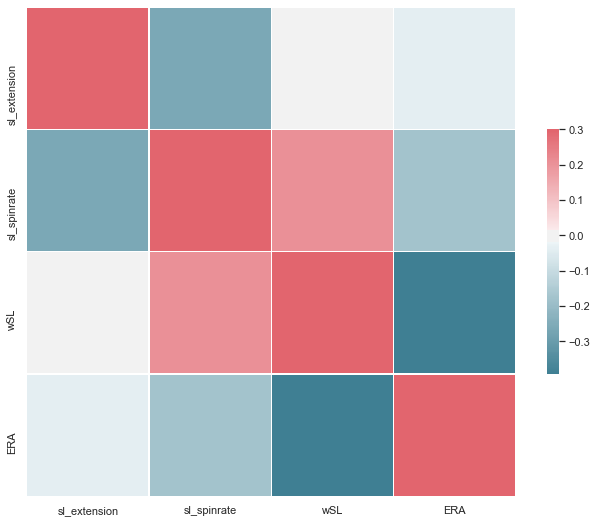

In [17]:
sl = df.loc[:,['sl_extension','sl_spinrate','wSL','ERA']]
corr = sl.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

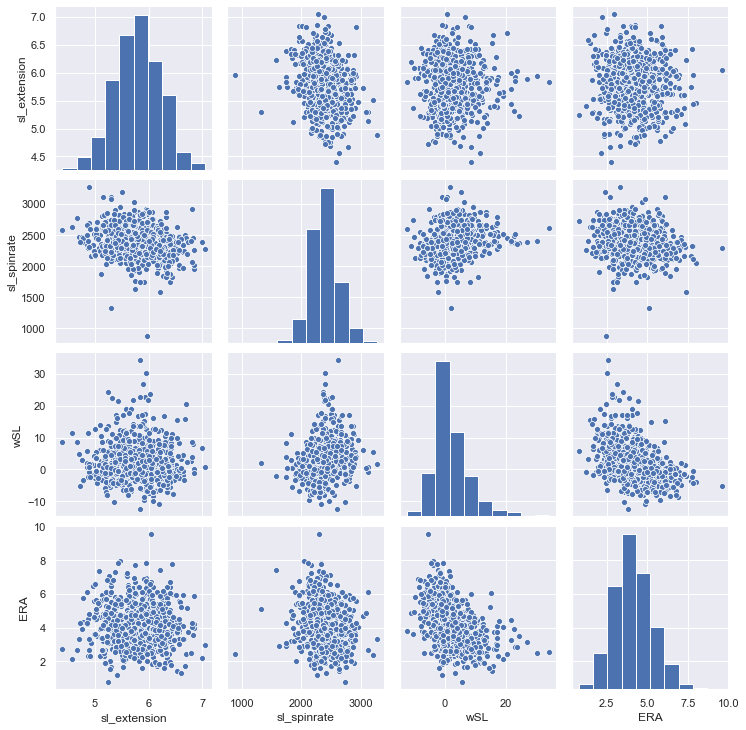

In [16]:
#scatterplot
sns.set()
sns.pairplot(sl, height = 2.5)
plt.show();

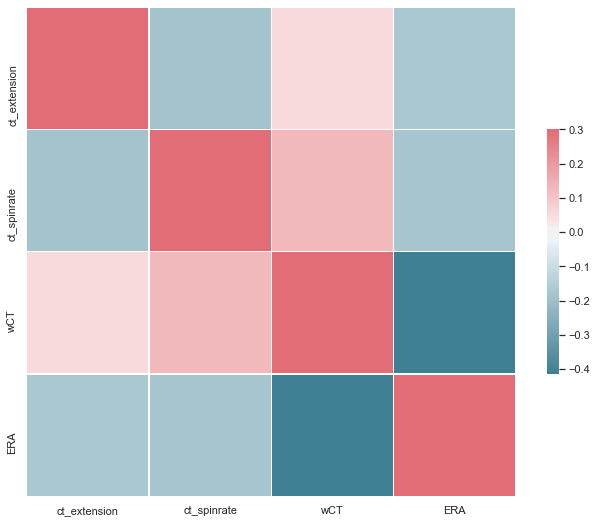

In [18]:
ct = df.loc[:,['ct_extension','ct_spinrate','wCT','ERA']]
corr = ct.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

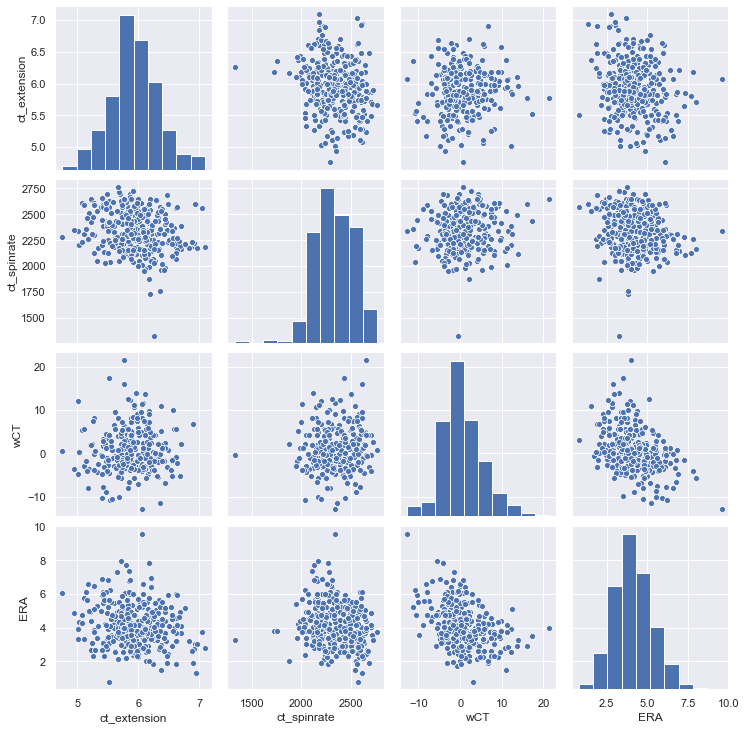

In [19]:
#scatterplot
sns.set()
sns.pairplot(ct, height = 2.5)
plt.show();

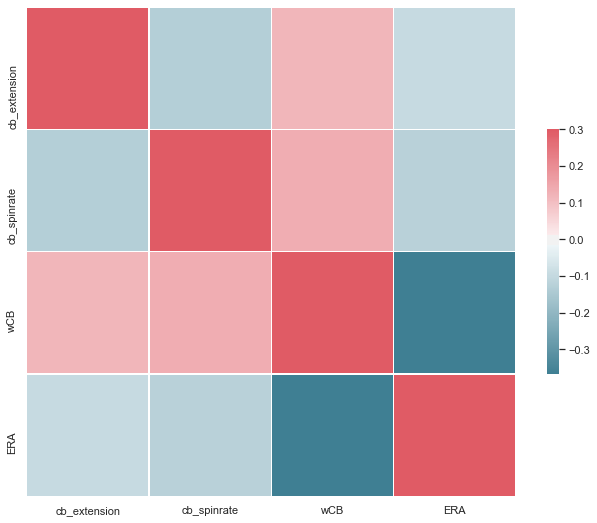

In [20]:
cb = df.loc[:,['cb_extension','cb_spinrate','wCB','ERA']]
corr = cb.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

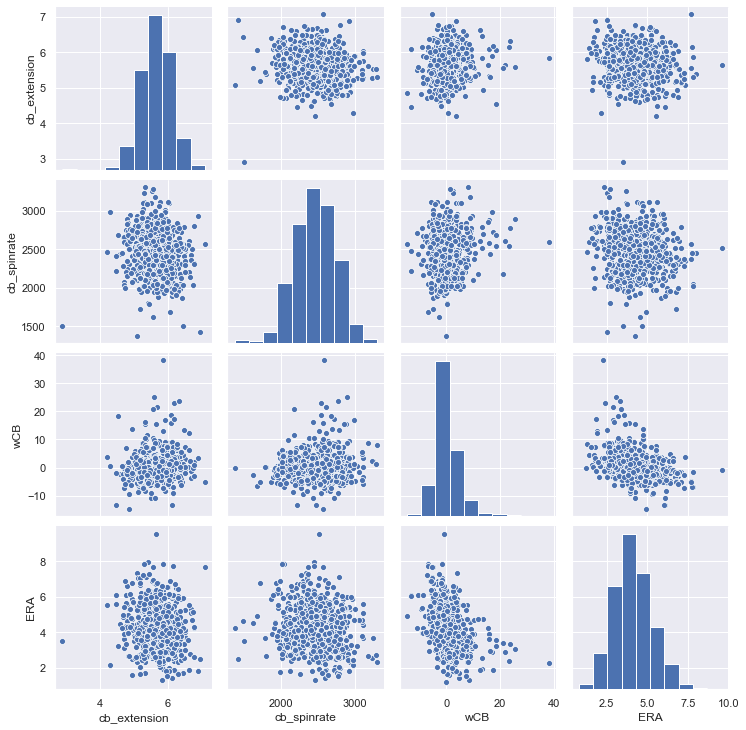

In [21]:
#scatterplot
sns.set()
sns.pairplot(cb, height = 2.5)
plt.show();

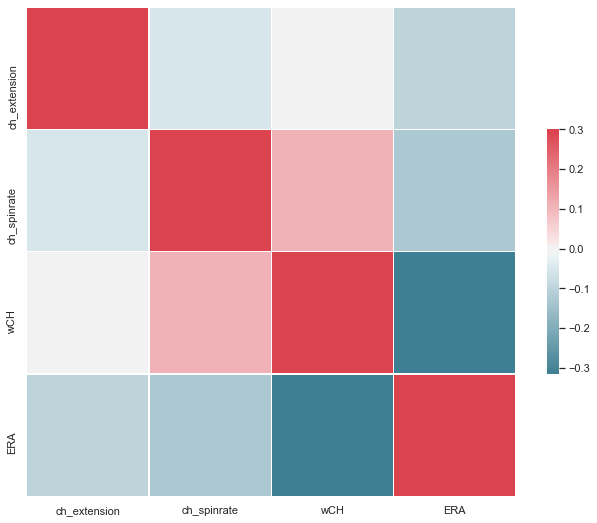

In [22]:
ch = df.loc[:,['ch_extension','ch_spinrate','wCH','ERA']]
corr = ch.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

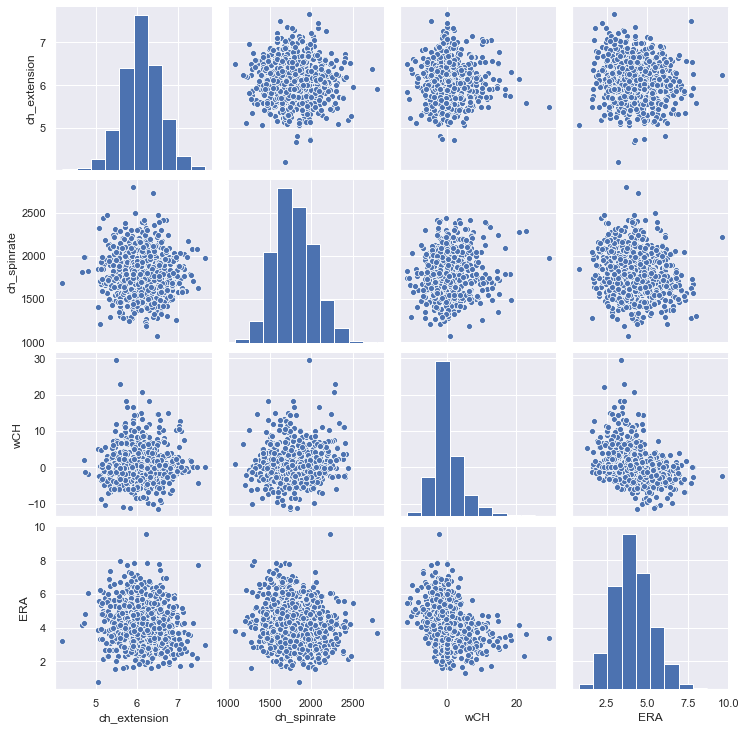

In [23]:
#scatterplot
sns.set()
sns.pairplot(ch, height = 2.5)
plt.show();

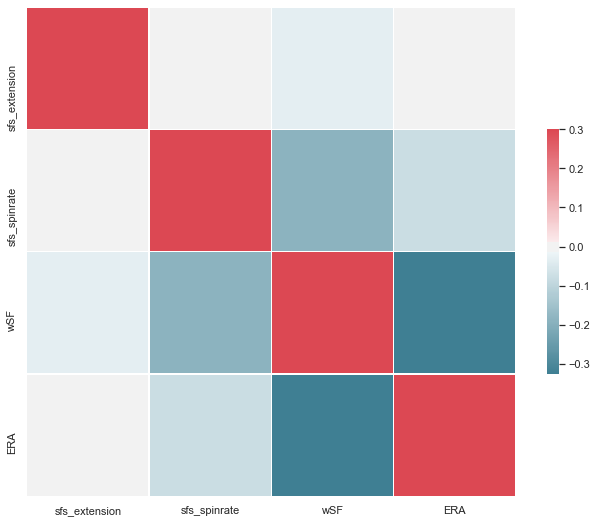

In [25]:
sfs = df.loc[:,['sfs_extension','sfs_spinrate','wSF','ERA']]
corr = sfs.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

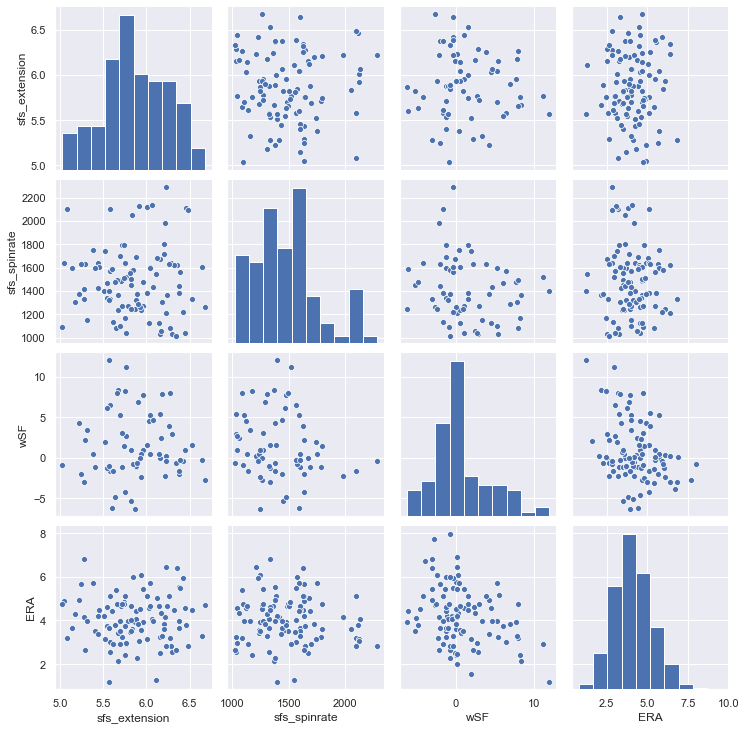

In [26]:
#scatterplot
sns.set()
sns.pairplot(sfs, height = 2.5)
plt.show();

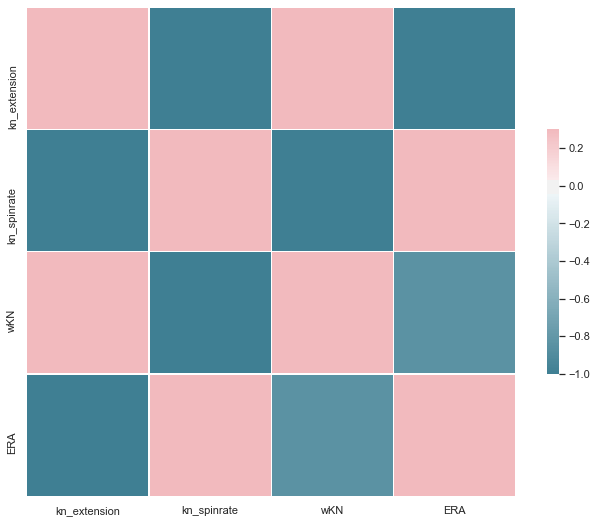

In [27]:
kn = df.loc[:,['kn_extension','kn_spinrate','wKN','ERA']]
corr = kn.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

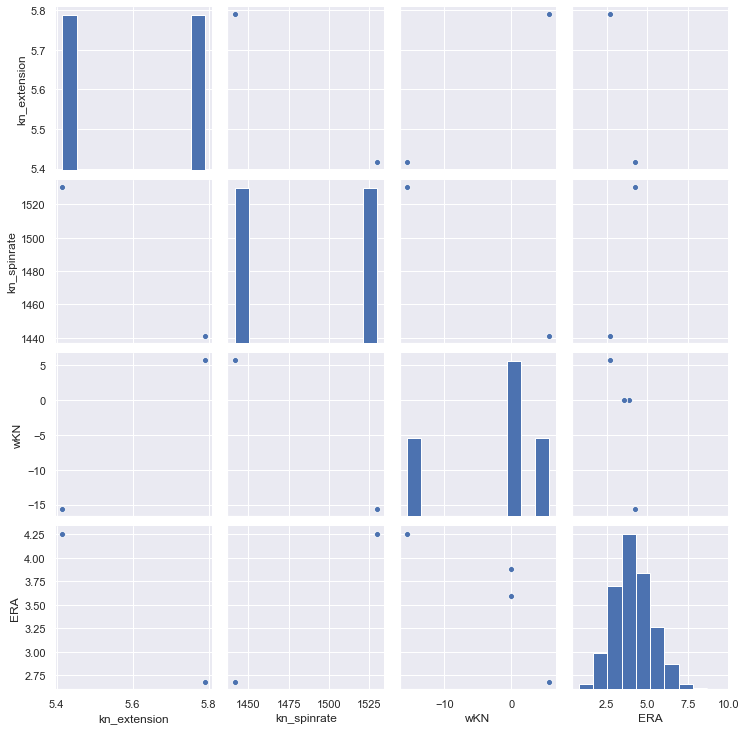

In [28]:
#scatterplot
sns.set()
sns.pairplot(kn, height = 2.5)
plt.show();